In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.style.use('fivethirtyeight')

data = pd.read_csv("HistoricalData_1651234982366.csv")
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,04/28/2022,$289.63,33646570,$285.185,$290.98,$281.4562
1,04/27/2022,$283.22,63477690,$282.1,$290.97,$279.16
2,04/26/2022,$270.22,46518450,$277.5,$278.3599,$270
3,04/25/2022,$280.72,35678850,$273.29,$281.11,$270.77
4,04/22/2022,$274.03,29405800,$281.68,$283.2,$273.38


In [2]:
data.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [3]:
data['Close/Last'] = data['Close/Last'].str.strip('$')
data['Close/Last'] = data['Close/Last'].astype(float)

In [4]:
data['Open'] = data['Open'].str.strip('$')
data['Open'] = data['Open'].astype(float)

data['High'] = data['High'].str.strip('$')
data['High'] = data['High'].astype(float)

data['Low'] = data['Low'].str.strip('$')
data['Low'] = data['Low'].astype(float)

data.head()

,Date,Close/Last,Volume,Open,High,Low
0,04/28/2022,289.63,33646570,285.185,290.9800,281.4562
1,04/27/2022,283.22,63477690,282.100,290.9700,279.1600
2,04/26/2022,270.22,46518450,277.500,278.3599,270.0000
3,04/25/2022,280.72,35678850,273.290,281.1100,270.7700
4,04/22/2022,274.03,29405800,281.680,283.2000,273.3800


In [5]:
data['Date'] = pd.to_datetime(data['Date'])

data.head()

,Date,Close/Last,Volume,Open,High,Low
0,2022-04-28,289.63,33646570,285.185,290.9800,281.4562
1,2022-04-27,283.22,63477690,282.100,290.9700,279.1600
2,2022-04-26,270.22,46518450,277.500,278.3599,270.0000
3,2022-04-25,280.72,35678850,273.290,281.1100,270.7700
4,2022-04-22,274.03,29405800,281.680,283.2000,273.3800


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        253 non-null    datetime64[ns]
 1   Close/Last  253 non-null    float64       
 2   Volume      253 non-null    int64         
 3   Open        253 non-null    float64       
 4   High        253 non-null    float64       
 5   Low         253 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 12.0 KB


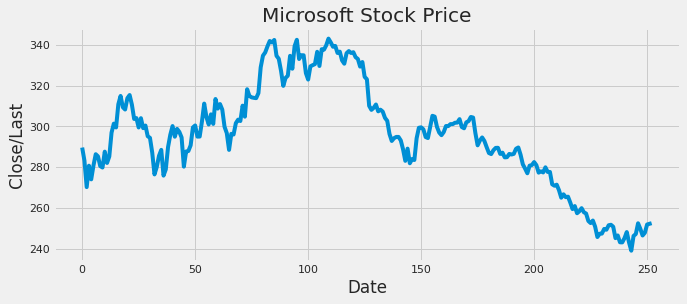

In [7]:
plt.figure(figsize=(10, 4))
plt.title('Microsoft Stock Price')
plt.xlabel('Date')
plt.ylabel('Close/Last')
plt.plot(data['Close/Last'])
plt.show()

,Volume
count,2.530000e+02
mean,2.831824e+07
std,1.089075e+07
min,1.390017e+07
25%,2.130737e+07
50%,2.618685e+07
75%,3.272002e+07
max,9.042885e+07


            Close/Last    Volume      Open      High       Low
Close/Last    1.000000  0.062657  0.987400  0.993729  0.993846
Volume        0.062657  1.000000  0.079238  0.112008  0.017604
Open          0.987400  0.079238  1.000000  0.995524  0.993864
High          0.993729  0.112008  0.995524  1.000000  0.992678
Low           0.993846  0.017604  0.993864  0.992678  1.000000


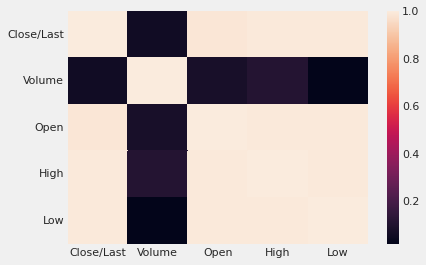

In [8]:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

In [9]:
x = data[['Open', 'High', 'Low']]
y = data['Close/Last']
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
data_res = pd.DataFrame(data={'Predicted Rate': y_pred})
data_res.head()

,Predicted Rate
0,271.40
1,288.33
2,329.37
3,279.32
4,336.99
